# Introduction

Here I'm looking at the cover times of the random walker versus the urban explorer on the ring graph

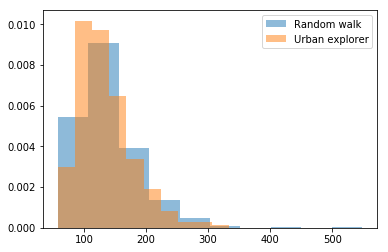

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import funcs as f
import osmnx as ox
import networkx as nx
from multiprocessing import Pool
from datetime import datetime
import time as time
from scipy import optimize
import pickle
%matplotlib inline

num_nodes = 20
G = nx.star_graph(num_nodes)

num_trials, m = 1000, 1  # m = number of times each node has to be covered
Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
plt.hist(Ts_rw,normed=True,alpha=0.5);plt.hist(Ts_ue,normed=True,alpha=0.5);
plt.legend(['Random walk','Urban explorer'])

#np.savetxt('data/covertimes_path_urban_explorer.txt',Ts_ue)
#np.savetxt('data/covertimes_path_random_walker.txt',Ts_rw)

## Be systematic

In [ ]:
meanTratios = []
varTratios = []
Ns = range(5,101,5)
m = 1
for N in Ns:
    num_trials = 500
    G = nx.star_graph(num_nodes)
    Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
    Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    meanTratios.append(np.mean(Ts_ue)/np.mean(Ts_rw))
    #varTratios.append(np.std(Ts_ue) / np.std(Ts_rw) ) 
    print 'finished N = ' + str(N)
plt.plot(Ns,meanTratios,'ko-')
#plt.plot(Ns,varTratios,'ko-')
plt.xlabel('N',fontsize=18)
#plt.ylabel(' $ \langle T \rangle_{UE} / \langle T \rangle_{RW} $ ')
plt.hlines(1,0,max(Ns),linestyles='dashed')

#np.savetxt('data/mean_covertime_ratio_path.txt',meanTratios)
#np.savetxt('data/mean_covertime_ratio_path_Ns.txt',Ns)

finished N = 5
finished N = 10
finished N = 15
finished N = 20
finished N = 25


In [8]:
Ts = []
Ns = range(1,1000,50)
m = 1
for N in Ns:
    num_trials = 500
    G = nx.path_graph(N)
    T = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    Ts.append(np.mean(T))
    print 'finished N = ' + str(N)
plt.plot(Ns,Ts,'ko-')
plt.xlabel('N',fontsize=18)
#plt.ylabel(' $ \langle T \rangle_{UE} / \langle T \rangle_{RW} $ ')

finished N = 1
finished N = 51
finished N = 101
finished N = 151
finished N = 201
finished N = 251
finished N = 301


KeyboardInterrupt: 

In [ ]:
plt.plot(Ns,Ts,'k.')
plt.plot(Ns,2.5*np.array(Ns),'r--')